In [3]:
import pandas as pd
import uuid as uid
import numpy as np

In [21]:
uid.uuid4()

UUID('b10cfddf-2f82-41af-bb72-c04db647ae02')

In [5]:
ID = []
for i in range(5000):
    ID.append(str(uid.uuid4()))

In [14]:
data = pd.read_csv("EACOPV3.csv")
# data['tweetID'] = ID


In [19]:
data.describe()

,Unnamed: 0,following,followers,totaltweets,retweetcount,accountID,tweetID
count,13910.000000,13910.000000,1.391000e+04,1.391000e+04,13910.000000,1.391000e+04,1.391000e+04
mean,6954.500000,1694.113372,1.000731e+04,2.412836e+04,64.164989,9.821291e+17,1.576351e+18
std,4015.615457,4416.996085,8.221841e+04,6.569550e+04,97.039963,6.173802e+17,9.604989e+14
min,0.000000,0.000000,0.000000e+00,1.000000e+00,0.000000,6.246152e+06,1.574810e+18
25%,3477.250000,193.000000,1.360000e+02,1.483250e+03,5.000000,4.762522e+09,1.575460e+18
50%,6954.500000,702.000000,5.550000e+02,6.127500e+03,25.000000,1.293895e+18,1.576410e+18
75%,10431.750000,1789.000000,2.009000e+03,2.001375e+04,92.000000,1.476885e+18,1.577270e+18
max,13909.000000,151369.000000,1.807478e+06,1.307937e+06,3240.000000,1.577660e+18,1.577730e+18


In [20]:
user=data[['username', 'description', 'following', 'followers', 'totaltweets', 'accountCreatedAt', 'accountID', "tweetID"]]
tweet=data[['location', 'retweetcount', 'text', 'hashtags', 'username', "tweetID"]]

In [72]:
user.drop_duplicates(subset="username",inplace=True)
user.username.duplicated().unique()

/Users/wgl8723/Desktop/Sandbox/twitterBotDetection/.venv/lib/python3.7/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


array([False])

In [7]:
def getMentionedUsers(s):
    foundAt= False
    mentioned = []
    store = ""
    for i in range(len(s)):
        if s[i] == "@": #a user is mentioned whenever we see @
            foundAt = True
            start = i
            while start != len(s) and  s[start]!= " " and s[start] != "." :
                store += s[start]
                start += 1
            store = store[1:]
            mentioned.append(store)
            store = ""
    return mentioned

In [22]:
# {tweetAuthor: [@user1, @user2, @user3, @user4, @user5, @user6]}
# create graph of tweet author here.
d=dict()
for ind in tweet.index:
    if '@' in tweet['text'][ind]:
        store = ""
        
        for e in tweet['text'][ind]:

            if e=='@':
                store += e

        # print(tweet['text'][ind])
        # d[tweet["tweetID"][ind]] = getMentionedUsers(tweet['text'][ind])
        d[tweet["username"][ind]] = getMentionedUsers(tweet['text'][ind])

In [44]:
d

{'esbast': ['nilepostnews\n\nhttps://t'],
 'blackpemdr': ['oyite6', 'YN_BUDDU', 'KagutaMuseveni'],
 'Ssebherbert': ['PoliceUg', 'GovUganda', 'EUinUG'],
 'Davidxvx': ['nilepostnews\n\nhttps://t'],
 'patrickMalala9': ['EUinUG',
  'EUparliament',
  'GovUganda',
  'UgandaMFA',
  'GCICUganda',
  'mofpedU',
  'EU_Partnerships',
  'eu_eeas',
  'Trade_EU',
  'EU_Commission',
  'EUCouncil',
  'stopEACOP',
  'OmarElmawi',
  'pmuliisa21',
  'Cathiewabomba',
  'elisonk',
  'GloriaSebikari',
  'SsekatawaAli',
  'masyus11',
  'CNOOCUgandaLtd',
  'TotalEnergiesUG',
  'UNOC_UG'],
 'sejemahad': ['abubakerlubowa'],
 'AwakenMILLION1': ['norbertmao', 'KiryowaKk', 'KagutaMuseveni', 'EUinUG'],
 'MbabaziMugira': ['unsaugofficial'],
 'JovanJoel7': ['PoliceUg', 'GovUganda', 'EUinUG'],
 'katoibrah': ['EUinUG',
  'EUparliament',
  'GovUganda',
  'UgandaMFA',
  'GCICUganda',
  'mofpedU',
  'EU_Partnerships',
  'eu_eeas',
  'Trade_EU',
  'EU_Commission',
  'EUCouncil'],
 'atuhire_jesca': ['HillaryTaylorVI',
  'EU_

In [24]:
import networkx as nx

In [25]:
g = nx.Graph(d)

In [27]:
pRank = nx.pagerank(g, alpha = 0.85, personalization=None)

In [46]:
pRank

{'esbast': 0.000136836157821486,
 'blackpemdr': 0.0007793708806600424,
 'Ssebherbert': 0.00014397341141104449,
 'Davidxvx': 0.000136836157821486,
 'patrickMalala9': 0.0006274247056311586,
 'sejemahad': 0.0001328575802123081,
 'AwakenMILLION1': 0.000202018215117432,
 'MbabaziMugira': 8.123467594333339e-05,
 'JovanJoel7': 0.00014397341141104449,
 'katoibrah': 0.00033883699868606247,
 'atuhire_jesca': 0.00027235345502898804,
 'psamguy': 0.00014397341141104449,
 'stopEACOP': 0.004963694104173967,
 'Remy_Zahiga': 8.324455989226857e-05,
 'paulsenalt': 0.000136836157821486,
 'Nanyanz1Bridget': 0.00014397341141104449,
 'MailoLand': 0.0001013666306613627,
 'SeruIshmael': 0.00019002165179506265,
 'MarieBelomo': 0.000136836157821486,
 'NakoraP': 0.00016220804806347464,
 'AidenOwa': 0.00013370056933572797,
 'jose_glorious': 0.00014397341141104449,
 'Reaganhart11': 0.00014397341141104449,
 'wakanda_boy': 0.00014397341141104449,
 'bacraf17': 0.000136836157821486,
 'ategekabalikoow': 0.00014724085550

In [36]:
max(pRank, key=pRank.get)

'EUinUG'

In [47]:
pRank["galleerie"]

0.0032400517769004527

In [37]:
pRank['EUinUG']

0.018292093219528238

In [49]:
from collections import Counter
TopFromPageRank = dict(Counter(pRank).most_common(10))

In [50]:
TopFromPageRank

{'EUinUG': 0.018292093219528238,
 'KagutaMuseveni': 0.018145219220789828,
 'francis_isano\n#News247': 0.018076746896545835,
 'TotalEnergies': 0.013224765251232189,
 'francis_isano\n\n#NBSUpdates': 0.012269178611132116,
 'GovUganda': 0.012215807554067626,
 'Europarl_EN': 0.011696058710826272,
 'CNOOCUgandaLtd': 0.010762651921424208,
 'PoliceUg': 0.008978604298700782,
 'HEBobiwine': 0.008906136314552244}

In [ ]:
max(pRank)

In [41]:
g["EUinUG"]

AtlasView({'Ssebherbert': {}, 'patrickMalala9': {}, 'AwakenMILLION1': {}, 'JovanJoel7': {}, 'katoibrah': {}, 'psamguy': {}, 'Nanyanz1Bridget': {}, 'SeruIshmael': {}, 'jose_glorious': {}, 'Reaganhart11': {}, 'wakanda_boy': {}, 'RaphSeguin': {}, 'hon_nabuyanda': {}, 'senjalamo13': {}, 'Sabakristu': {}, 'SienceTalk': {}, 'SuunaKing_James': {}, 'MukiibiAshiraf4': {}, 'Nuwamanya_I': {}, 'mutyaba_iddi': {}, 'Edgar_ayebazbwe': {}, 'ConsciousSoul4': {}, 'kabandawhat': {}, 'MukfaiHEALTH': {}, 'ZaydeeKay': {}, 'BunnyaRogers1': {}, 'Asiimwe42303288': {}, 'AndrieTro28': {}, 'iArereng': {}, 'Gablousmukiibi4': {}, 'MartinLukanga': {}, 'Mich_ka': {}, 'okim_emmanel': {}, 'desmond_thuambe': {}, 'vicentshawn1': {}, 'Mukubwa14': {}, 'Titefred2': {}, 'HilkiahB': {}, 'lesquad4': {}, 'Steward_zeni': {}, 'RamlahNansereko': {}, 'mugerwajosephs': {}, 'fredriechyiga': {}, 'Kayraht': {}, 'ShafickKingdom': {}, 'justicechilling': {}, 'CyrusSsemujju': {}, 'Lucki68951651': {}, 'ladytryna256': {}, 'LitleTenda': {}, '

In [157]:
G = nx.DiGraph()
G.add_nodes_from(d.keys())

labels = {
    n: (G.nodes[n]['label']
        if len(list(nx.all_neighbors(G, n))) > 5
        else '')
    for n in G.nodes
}

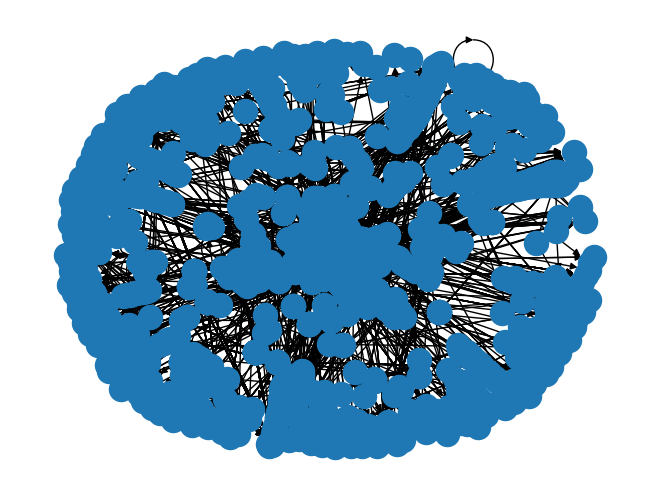

In [158]:

for k, v in d.items():
    G.add_edges_from(([(k, t) for t in v]))
nx.draw(G, with_labels=True, font_size= 10, font_weight="normal", labels=labels )